In [2]:
import torch

print("Cuda available:", torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

Cuda available: True
NVIDIA GeForce GTX 1660


In [3]:
from transformers import CLIPVisionModelWithProjection, CLIPImageProcessor

device = "cuda"

image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    "h94/IP-Adapter", 
    subfolder="models/image_encoder",
    torch_dtype=torch.float16
).to(device)

image_encoder

`torch_dtype` is deprecated! Use `dtype` instead!


CLIPVisionModelWithProjection(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (position_embedding): Embedding(257, 1280)
    )
    (pre_layrnorm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-31): 32 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (layer_norm1): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1280, out_features=51

In [4]:
clip_image_size = image_encoder.config.image_size
feature_extractor = CLIPImageProcessor(size=clip_image_size, crop_size=clip_image_size)

feature_extractor

CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

In [49]:
from diffusers.utils import load_image
from PIL import Image

def get_embeddings(images: list):
    image_features = feature_extractor(images=images, return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        outputs = image_encoder(image_features, output_hidden_states=True)
        embeddings = outputs.hidden_states[-2]
        #embeddings = image_encoder(image_features, output_hidden_states=False)

    return embeddings

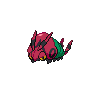

In [41]:
venipede_image = load_image("./venipede_white.png")
venipede_image

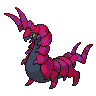

In [42]:
scolipede_image = load_image("./scolipede_white.png")
scolipede_image

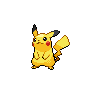

In [43]:
pikachu_image = load_image("./pikachu_white.png")
pikachu_image

In [68]:
# import requests

# requests.get("https://pokeapi.co/api/v2/ability/1/")

In [148]:
from PIL import Image

temp = Image.open("charizard.png")

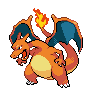

In [149]:
temp

In [150]:
temp.mode

'P'

In [153]:
transparency_index = temp.info.get("transparency")

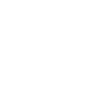

In [154]:
mask = temp.point(lambda i: 0 if i == transparency_index else 255, mode='L')
mask

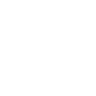

In [156]:
background = Image.new("RGBA", temp.size, "WHITE")
background

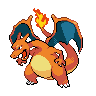

In [157]:
background.paste(temp, (0, 0), mask)
background

In [152]:
temp.info

{'transparency': 0}

In [151]:
import numpy as np

np.asarray(temp)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

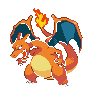

In [144]:
sprites_dir = "/home/kojo/Code/sprites/sprites/pokemon/versions/generation-v/black-white/"

bulbasaur_image = load_image(f"{sprites_dir}/6.png")
bulbasaur_image

In [140]:
del bulbasaur_image.info["transparency"]

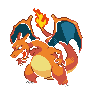

In [146]:
bulbasaur_image = bulbasaur_image.convert("RGBA")
bulbasaur_image

{}

In [147]:
import numpy as np

np.asarray(bulbasaur_image)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [136]:
bulbasaur_image.mode

'RGBA'

In [121]:
bulbasaur_image.putalpha(10)

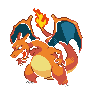

In [106]:
bulbasaur_image = load_image(f"charizard.png").convert("RGBA")
bulbasaur_image

In [128]:
bulbasaur_image.info

{'transparency': (0, 0, 0)}

In [97]:
bulbasaur_image.save("temp.png")

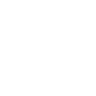

In [155]:
background = Image.new("RGBA", bulbasaur_image.size, "WHITE")
background

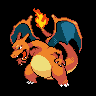

In [138]:
background.paste(bulbasaur_image, (0, 0), bulbasaur_image)
background

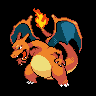

In [143]:
Image.alpha_composite(background, bulbasaur_image)

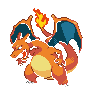

In [96]:
background

In [98]:
background.save("temp2.png")


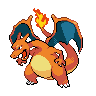

In [208]:
from PIL import Image

def get_pokemon_images(start=0, end=100, dir=sprites_dir):
    images = []
    for i in range(start, end+1):
        base_image = Image.open(f"{dir}/{i}.png")
        transparency_index = base_image.info.get("transparency")
        mask = base_image.point(lambda i: 0 if i == transparency_index else 255, mode='L')
        new_image = Image.new("RGBA", base_image.size, "WHITE")
        new_image.paste(base_image, (0, 0), mask)
        images.append(new_image)
    
    return images

pokemon_images = get_pokemon_images()
pokemon_images[6]

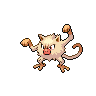

In [209]:
pokemon_images[56]

In [202]:
image_embeds = get_embeddings([venipede_image, scolipede_image, pikachu_image])
image_embeds.shape

torch.Size([3, 257, 1280])

In [1]:
from sklearn.decomposition import PCA

In [52]:
nsamples, nx, ny = image_embeds.shape
image_embeds = image_embeds.reshape(nsamples, nx*ny)
image_embeds.shape

torch.Size([3, 328960])

In [54]:
pca = PCA(n_components=3)
Xt = pca.fit_transform(image_embeds.cpu())
Xt.shape

(3, 3)

In [55]:
Xt

array([[ 6.68902530e+01,  1.45984290e+02, -1.54951597e-12],
       [-2.01727168e+02, -2.94717877e+01, -1.54951597e-12],
       [ 1.34836915e+02, -1.16512502e+02, -1.54951597e-12]])

In [56]:
names = ["venipede", "scolipede", "pikachu"]
names

['venipede', 'scolipede', 'pikachu']

In [66]:
import polars as pl

df = pl.from_numpy(Xt, schema=["pc1", "pc2", "pc3"], orient="row")
df = df.with_columns(
    name=pl.Series(names),
    ind=pl.Series(range(len(names)))
)

df

pc1,pc2,pc3,name,ind
f64,f64,f64,str,i64
66.890253,145.98429,-1.5495e-12,"""venipede""",0
-201.727168,-29.471788,-1.5495e-12,"""scolipede""",1
134.836915,-116.512502,-1.5495e-12,"""pikachu""",2


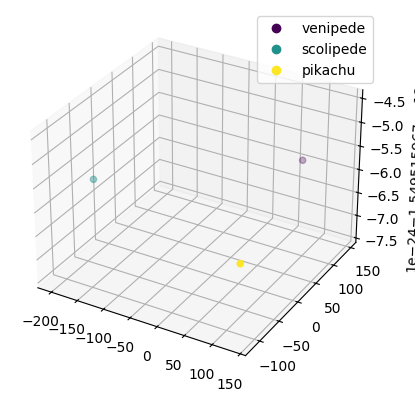

In [63]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
plot = ax.scatter(data=df, xs="pc1", ys="pc2", zs="pc3", c="ind", cmap='viridis')
plt.legend(handles=plot.legend_elements()[0], labels=names)
plt.show()

In [204]:
torch.cuda.empty_cache()

In [210]:
image_embeds = get_embeddings(pokemon_images)
image_embeds.shape

OutOfMemoryError: CUDA out of memory. Tried to allocate 64.00 MiB. GPU 0 has a total capacity of 5.79 GiB of which 32.81 MiB is free. Including non-PyTorch memory, this process has 5.19 GiB memory in use. Of the allocated memory 4.83 GiB is allocated by PyTorch, and 282.15 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
nsamples, nx, ny = image_embeds.shape
image_embeds = image_embeds.reshape(nsamples, nx*ny)
image_embeds.shape

torch.Size([101, 328960])

In [ ]:
pca = PCA(n_components=3)
Xt = pca.fit_transform(image_embeds.cpu())
Xt.shape

(101, 3)

In [184]:
import polars as pl

df = pl.from_numpy(Xt, schema=["pc1", "pc2", "pc3"], orient="row")
df = df.with_columns(
    #name=pl.Series(names),
    ind=pl.Series(range(Xt.shape[0]))
)

df

pc1,pc2,pc3,ind
f64,f64,f64,i64
41.143284,68.989087,27.422646,0
92.010433,24.314195,-16.08052,1
-8.917423,-59.876124,-7.261232,2
-96.757488,83.088485,11.406116,3
75.067983,7.119412,-79.390426,4
…,…,…,…
-1.952408,-44.21905,-6.542071,96
-51.430574,-26.050629,1.891648,97
46.437574,-18.261617,35.721286,98


In [185]:
Xt[0][0]

np.float64(41.14328354372891)

In [207]:
Xt

array([[  41.14328354,   68.9890873 ,   27.42264555],
       [  92.01043338,   24.31419504,  -16.0805202 ],
       [  -8.9174226 ,  -59.87612364,   -7.26123195],
       [ -96.75748782,   83.08848474,   11.40611567],
       [  75.06798272,    7.11941247,  -79.39042588],
       [ -34.28287341,  -28.81820201,  -75.80093471],
       [-108.14833595,   99.41083249,  -54.00202245],
       [  90.60088134,   12.72305624,  -62.83497406],
       [ -43.93526692,  -45.92543266,  -65.98790467],
       [ -89.60383438,   -1.16958368,  -35.7148766 ],
       [  88.42344306,   56.12329692,    5.5448978 ],
       [  91.8973097 ,   59.31973208,   22.98914576],
       [ -24.7479377 ,  -40.00679034,   18.33384962],
       [ 102.48329084,   47.39855187,  -11.08665396],
       [  86.67033286,   64.97769662,   22.1172953 ],
       [ -46.65131294,   -1.30786692,   39.37123172],
       [  87.96150378,   31.83550883,  -32.82227977],
       [ -89.42014501,   67.65161905,  -11.12115726],
       [ -61.83060365,    9.

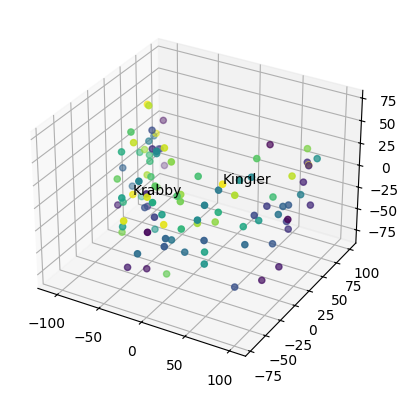

In [206]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
plot = ax.scatter(data=df, xs="pc1", ys="pc2", zs="pc3", c="ind", cmap='viridis')
#plt.legend(handles=plot.legend_elements()[0], labels=range(Xt.shape[0]))
p1 = 98 - 1
p2 = 99 - 1
ax.text(Xt[p1][0], Xt[p1][1], Xt[p1][2], "Krabby")
ax.text(Xt[p2][0], Xt[p2][1], Xt[p2][2], "Kingler")
plt.show()